# Problem 1
Suppose the state space for a system of particles is $ Ω = \{1, . . . , 8\} $ and their allocation among these states is determined by the Boltzmann distribution. Let the energy of state x be $ E(x) = (x−3)^2 $. Use the Metropolis algorithm, with $ β = 1 $ (see (3.21)), to estimate the expected “blackbody radiation” of the system if the radiation r is equal to the fourth power of energy, that is, take $ r(E) = E^4 $. (Exact: 6.166.)

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
def boltzmann_prob(x):
    E_x = (x-3)**2
    prob = np.exp(-E_x)
    return prob

In [35]:
markov_chain = []
markov_chain.append(1)

In [36]:
for i in range(1000000):
    current = markov_chain[i]
    if current == 1:
        proposition = current + np.random.choice([0,1])
    elif current == 8:
        proposition = current + np.random.choice([-1,0])
    else:
        proposition = current + np.random.choice([-1,1])
    acceptance_ratio = boltzmann_prob(proposition)/boltzmann_prob(current)
    if acceptance_ratio > 1:
        acceptance_prob = 1
    else:
        acceptance_prob = acceptance_ratio
    check = np.random.uniform(0,1)
    #print('Current: ' + str(markov_chain[i]) + '\t' + 'Proposed: ' + str(proposition) + '\n' + 'Probability: ' + str(acceptance_prob) + '\t')
    if check > acceptance_prob:
        markov_chain.append(current) #reject
    else:
        markov_chain.append(proposition) #accept

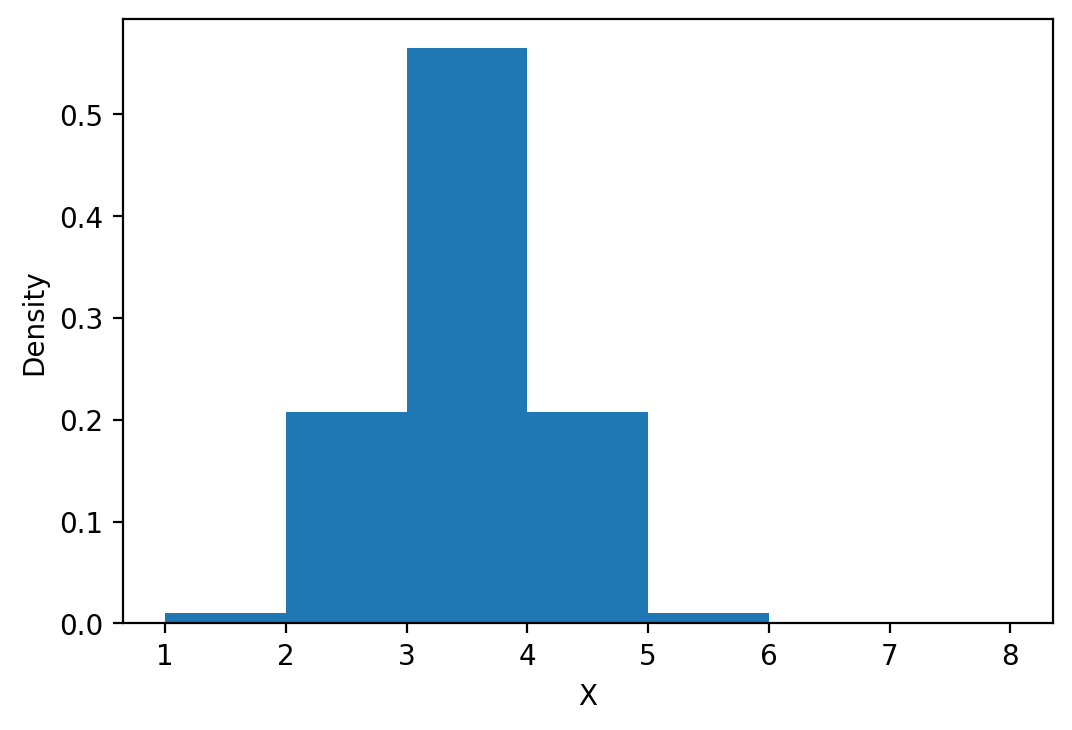

In [37]:
plt.figure(dpi=200)
plt.hist(markov_chain,bins=np.arange(1,9),density=True)
plt.xlabel('X')
plt.ylabel('Density')
plt.show()

In [27]:
markov_chain = np.array(markov_chain)

In [28]:
radiation = ((markov_chain-3)**2)**4

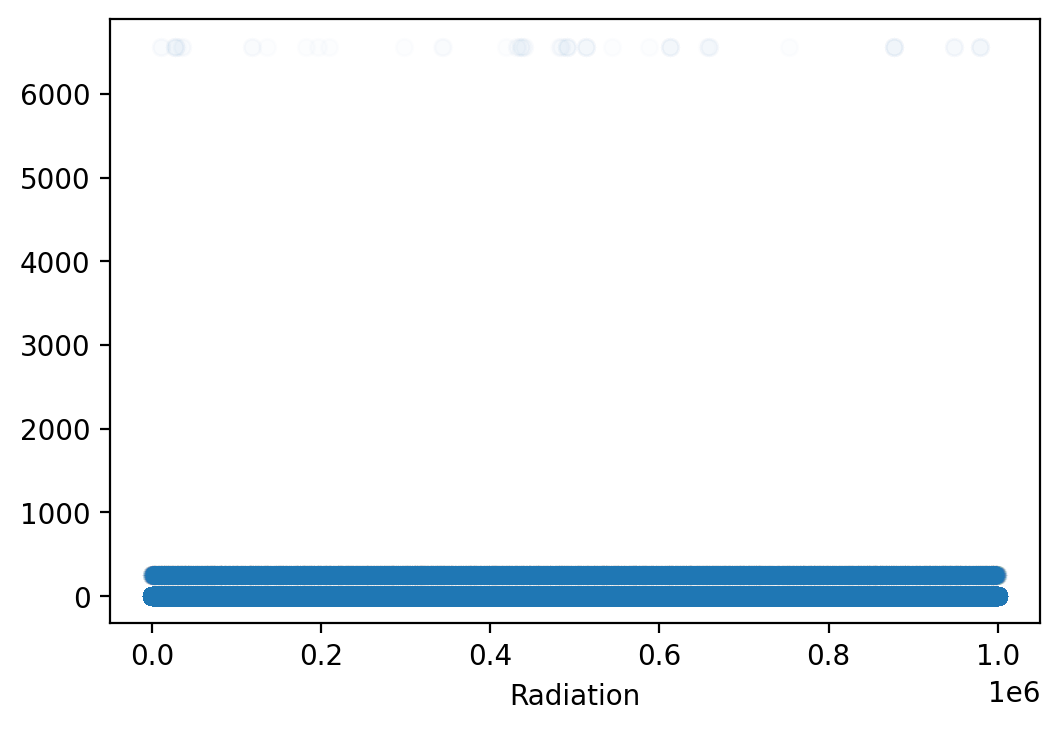

In [29]:
plt.figure(dpi=200)
plt.plot(radiation,linewidth=0,marker='o',alpha=0.01)
plt.xlabel('Radiation')
plt.show()

In [38]:
set(radiation)

{0, 1, 256, 6561}

In [39]:
np.mean(radiation)

6.072655927344073